In [1]:
#Although I've written about this in README file as well, I want to state it here again. The command to download the 
#fairMLHealth repository was not working and Jupyter Notebook kept stating that no such module exists. 
#Therefore, I downloaded the zip code from Github, and then pasted the folder "fairMLHealth" in the "site-packages" folder
#in the correct enviornment inside Anaconda. That seemed to solve the problem and I could use fairMLHealth library. 
#I am documenting it here in case some weird error pops up on your end.

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from IPython.display import display, HTML
from fairmlhealth import model_comparison as fhmc, reports
from sklearn.metrics import recall_score
import csv
import math
import re

In [2]:
#We name our columns so we can reference them in future on index.
my_columns = columns = ['status','duration','credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

#The real dataset we will use for our computations.
mydata = pd.read_csv('german.data', sep=" ", names=my_columns)

#This is only for creating Table 1
tabledata = pd.read_csv('german.data', sep=" ", names=my_columns)

#Brushing up and naming parts of data for our table 1 that seem important and relevent to this discussion.
tabledata['credit_risk'] = tabledata['credit_risk'].replace(1, "good")
tabledata['credit_risk'] = tabledata['credit_risk'].replace(2, "bad")
tabledata['foreign_worker'] = tabledata['foreign_worker'].replace("A201", "no")
tabledata['foreign_worker'] = tabledata['foreign_worker'].replace("A202", "yes")
tabledata['telephone'] = tabledata['telephone'].replace("A191", "none")
tabledata['telephone'] = tabledata['telephone'].replace("A192", "yes")
tabledata['job'] = tabledata['job'].replace("A171", "Unemployed(non-resident)")
tabledata['job'] = tabledata['job'].replace("A172", "Unemployed(resident)")
tabledata['job'] = tabledata['job'].replace("A173", "Employee")
tabledata['job'] = tabledata['job'].replace("A174", "highly-qualified/self-employed")
tabledata['housing'] = tabledata['housing'].replace("A151", "rent")
tabledata['housing'] = tabledata['housing'].replace("A152", "own")
tabledata['housing'] = tabledata['housing'].replace("A153", "for-free")
tabledata['other_installment_plans'] = tabledata['other_installment_plans'].replace("A141", "bank")
tabledata['other_installment_plans'] = tabledata['other_installment_plans'].replace("A142", "stores")
tabledata['other_installment_plans'] = tabledata['other_installment_plans'].replace("A143", "none")
tabledata['property'] = tabledata['property'].replace("A121", "real-estate")
tabledata['property'] = tabledata['property'].replace("A122", "life insurance")
tabledata['property'] = tabledata['property'].replace("A123", "car")
tabledata['property'] = tabledata['property'].replace("A124", "no property/unknown")

#I have chosen to omit some attributes from table 1 so we cover important attribute distributions and keep Table 1 short.
#Since these are int-values they become bothersome to the brevity.
tabledata = tabledata.drop(['amount'], axis = 1)
tabledata = tabledata.drop(['age'], axis = 1)
tabledata = tabledata.drop(['duration'], axis = 1)

#Currently our dataset has 1 for 0 and 2 for 1 for credit_risk. We will fix this later on when we are using the dataset for baselining. For 
#now to avoid confusion, I will use 1 and 2. All the mydata operations follow and are in their own section.
print("------------------------------------------------------TABLE 1-----------------------------------------------------")
table_columns = columns = ['status','credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
zeroTable = tabledata[1 == mydata.iloc[:, -1]]

oneTable = tabledata[2 == mydata.iloc[:, -1]]

print("Attr", "||", "General", "||", "Good", "||", "Bad")

for x in range(0, tabledata.shape[1] - 1): 
    print("-----------------------------------------------------------------------------------")
    print(table_columns[x], "\n")
    #This will give us keys always, we need this.
    counts = tabledata.iloc[:, x].value_counts().sort_index().keys().tolist()
    
    valuesTabledata = tabledata.iloc[:, x].value_counts().sort_index().tolist()
    valueszeroTable = zeroTable.iloc[:, x].value_counts().sort_index().tolist()
    valuesoneTable = oneTable.iloc[:, x].value_counts().sort_index().tolist()
    
    for y in range(0, len(counts)):
        if y >= len(valueszeroTable) and y >= len(valuesoneTable):
            print(counts[y], "||", valuesTabledata[y], "|", 0, "|", 0, "\n\n")
        elif y >= len(valuesoneTable):
            print(counts[y], "||", valuesTabledata[y], "|", valueszeroTable[y], "|", 0, "\n\n")
        elif y >= len(valueszeroTable):
            print(counts[y], "||", valuesTabledata[y], "|", 0, " ", valuesoneTable[y], "\n\n")
        else:
            print(counts[y], "||", valuesTabledata[y], "|", valueszeroTable[y], "|", valuesoneTable[y], "\n\n")
            






------------------------------------------------------TABLE 1-----------------------------------------------------
Attr || General || Good || Bad
-----------------------------------------------------------------------------------
status 

A11 || 274 | 139 | 135 


A12 || 269 | 164 | 105 


A13 || 63 | 49 | 14 


A14 || 394 | 348 | 46 


-----------------------------------------------------------------------------------
credit_history 

A30 || 40 | 15 | 25 


A31 || 49 | 21 | 28 


A32 || 530 | 361 | 169 


A33 || 88 | 60 | 28 


A34 || 293 | 243 | 50 


-----------------------------------------------------------------------------------
purpose 

A40 || 234 | 145 | 89 


A41 || 103 | 86 | 17 


A410 || 12 | 7 | 5 


A42 || 181 | 123 | 58 


A43 || 280 | 218 | 62 


A44 || 12 | 8 | 4 


A45 || 22 | 14 | 8 


A46 || 50 | 28 | 22 


A48 || 9 | 8 | 1 


A49 || 97 | 63 | 34 


-----------------------------------------------------------------------------------
savings 

A61 || 603 | 386 | 217

In [3]:
#We want to adjust our data. Since there's 20 attributes, let us convert the types that are actually int from obj -> int.
#We also want to change the mapping of true/false or binary values from obj/str -> int.

#Running this section more than once will cause issues because we convert obj -> int but then doing so again will change them 
#to NaN. To recompile please start from the first cell where we load our data from the dataset.
mydata['duration'] = mydata['duration'].astype(int)
mydata['installment_rate'] = mydata['installment_rate'].astype(int)
mydata['present_residence'] = mydata['present_residence'].astype(int)
mydata['age'] = mydata['age'].astype(int)
mydata['number_credits'] = mydata['number_credits'].astype(int)
mydata['people_liable'] = mydata['people_liable'].astype(int)
mydata['credit_risk'] = mydata['credit_risk'].astype(int)
mydata['telephone'] = mydata['telephone'].map({'A191': 1, 'A192': 0})
mydata['foreign_worker'] = mydata['foreign_worker'].map({'A201': 1, 'A202': 0})
mydata['credit_risk'] = mydata['credit_risk'].map({2: 1, 1: 0})
mydata['people_liable'] = mydata['people_liable'].map({2: 1, 1: 0})


for col_name in mydata.columns:
    if(mydata[col_name].dtype == 'object'):
        mydata[col_name]= mydata[col_name].astype('category')
        mydata[col_name] = mydata[col_name].cat.codes
    
    
X=mydata.iloc[:,:-1].values

y=mydata.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=123)


In [4]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, Y_train)
cvLogistic_scores = cross_val_score(clf, X, y, cv=10)
logisticScore = clf.score(X_test, Y_test)
print(logisticScore)

0.775


In [5]:
decTree = DecisionTreeClassifier(max_depth = 4, random_state=0)
decTree.fit(X_train, Y_train)
decTree_scores = cross_val_score(decTree, X, y, cv=10)
treeScore = decTree.score(X_test, Y_test)
print(treeScore)

0.775


In [6]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, Y_train)
NB_scores = cross_val_score(naiveBayes, X, y, cv=10)
nbScore = naiveBayes.score(X_test, Y_test)
print(nbScore)

0.75


In [7]:
randForest = RandomForestClassifier(max_depth=4, random_state=0, class_weight={0:1,1:1.55})
randForest.fit(X_train, Y_train)
randForest_scores = cross_val_score(randForest, X, y, cv=10)
randScore = randForest.score(X_test, Y_test)
print(randScore)

0.79


In [8]:
#As mentioned in class, we can use pre-built classifiers. To run this XGBoost, please use the following
# command in Anaconda: conda install -c anaconda py-xgboost.
XGBoo = XGBClassifier()
XGBoo.fit(X_train,Y_train)
XG_scores = cross_val_score(XGBoo, X, y, cv=10)
XGBoo.score(X_test, Y_test)

0.805

In [9]:
#lET'S CALCULATE OUR PREDICTIONS SINCE WE WILL NEED THEM FOR THE TABLE FOR AUC, PRECISION, RECALL AND F-SCORE
y_predLog = clf.predict(X_test)
y_predDec = decTree.predict(X_test)
y_predNB = naiveBayes.predict(X_test)
y_predRF = randForest.predict(X_test)
y_predXG = XGBoo.predict(X_test)

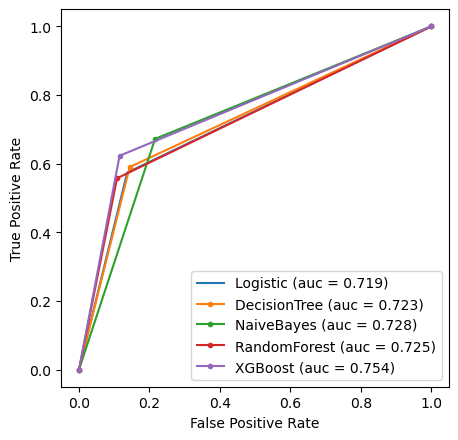

In [10]:
#BONUS GRAPH TO SHOW AUC, FP AND TP RATES. TABLE COMES LATER.
logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, y_predLog)
auc_logistic = auc(logistic_fpr, logistic_tpr)

decision_fpr, decision_tpr, threshold = roc_curve(Y_test, y_predDec)
auc_decision = auc(decision_fpr, decision_tpr)

bayes_fpr, bayes_tpr, threshold = roc_curve(Y_test, y_predNB)
auc_bayes = auc(bayes_fpr, bayes_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(Y_test, y_predRF)
auc_rf = auc(rf_fpr, rf_tpr)

XG_fpr, XG_tpr, threshold = roc_curve(Y_test, y_predXG)
auc_XG = auc(XG_fpr, XG_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label="Logistic (auc = %0.3f)" % auc_logistic)
plt.plot(decision_fpr, decision_tpr, marker='.', label="DecisionTree (auc = %0.3f)" % auc_decision)
plt.plot(bayes_fpr, bayes_tpr, marker='.', label="NaiveBayes (auc = %0.3f)" % auc_bayes)
plt.plot(rf_fpr, rf_tpr, marker='.', label="RandomForest (auc = %0.3f)" % auc_rf)
plt.plot(XG_fpr, XG_tpr, marker='.', label="XGBoost (auc = %0.3f)" % auc_XG)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

#Showing in a graph makes it easier to see and compare.
plt.legend()
plt.show()

In [11]:
#CALCULATE PRECISION
precisionLog = precision_score(Y_test, y_predLog, average = 'binary')
precisionDec = precision_score(Y_test, y_predDec, average = 'binary')
precisionNB = precision_score(Y_test, y_predNB, average = 'binary')
precisionRF = precision_score(Y_test, y_predRF, average = 'binary')
precisionXG = precision_score(Y_test, y_predXG, average = 'binary')

#CALCULATE RECALL
recallLog = recall_score(Y_test, y_predLog, average = 'binary')
recallDec = recall_score(Y_test, y_predDec, average = 'binary')
recallNB = recall_score(Y_test, y_predNB, average = 'binary')
recallRF = recall_score(Y_test, y_predRF, average = 'binary')
recallXG = recall_score(Y_test, y_predXG, average = 'binary')

#CALCULATE F-SCORE
FLog = f1_score(Y_test, y_predLog, average = 'binary')
FDec = f1_score(Y_test, y_predDec, average = 'binary')
FNB = f1_score(Y_test, y_predNB, average = 'binary')
FRF = f1_score(Y_test, y_predRF, average = 'binary')
FXG = f1_score(Y_test, y_predXG, average = 'binary')

In [12]:
print("ML METHOD  ||         AUC          ||          PRECISION      ||          RECALL         ||         FSCORE     || 10-K Average")
print("-------------------------------------------------------------------------------------------------------------------")
print("LR         ||", auc_logistic, "  ||", precisionLog, "     ||", recallLog, "     ||", FLog, "||", np.mean(cvLogistic_scores))
print("DT         ||", auc_decision, "  ||", precisionDec, "     ||", recallDec, "     ||", FDec, "||", np.mean(decTree_scores))
print("NB         ||", auc_bayes, "  ||", precisionNB, "     ||", recallNB, "     ||", FNB, "||", np.mean(NB_scores))
print("RF         ||", auc_rf, "  ||", precisionRF, "     ||", recallRF, "     ||", FRF, "||", "%0.3f" % np.mean(randForest_scores))
print("XGBoost    ||", auc_XG, "  ||", precisionXG, "     ||", recallXG, "     ||", FXG, "||", np.mean(XG_scores))

ML METHOD  ||         AUC          ||          PRECISION      ||          RECALL         ||         FSCORE     || 10-K Average
-------------------------------------------------------------------------------------------------------------------
LR         || 0.7185399221606321   || 0.6481481481481481      || 0.5737704918032787      || 0.6086956521739131 || 0.763
DT         || 0.7231395211699493   || 0.6428571428571429      || 0.5901639344262295      || 0.6153846153846154 || 0.719
NB         || 0.7281519047057436   || 0.5774647887323944      || 0.6721311475409836      || 0.6212121212121212 || 0.734
RF         || 0.7247316900577898   || 0.6938775510204082      || 0.5573770491803278      || 0.6181818181818182 || 0.751
XGBoost    || 0.7539214530015332   || 0.7037037037037037      || 0.6229508196721312      || 0.6608695652173914 || 0.765


In [13]:
print("---------------------------------------------FAIRMLHEALTH SECTION-----------------------------------------------------")

---------------------------------------------FAIRMLHEALTH SECTION-----------------------------------------------------


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=36)
temp_columns = columns = ['status','duration','credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

X_test_health = pd.DataFrame(X_test, columns = temp_columns)

model_dict = {'model_1': clf, 'model_2': decTree, 'model_3': naiveBayes, 'model_4': randForest, 'model_5': XGBoo}

prtc_attr = X_test_health['foreign_worker']

fhmc.compare_measures(X_test, y_test, prtc_attr, model_dict)

model_1  \
Group Fairness       Statistical Parity Difference            -0.1419   
                     Disparate Impact Ratio                    0.3271   
                     Demographic Parity Difference             0.1419   
                     Demographic Parity Ratio                  0.3271   
                     Average Odds Difference                  -0.1336   
                     Equal Opportunity Difference             -0.2102   
                     Equalized Odds Difference                 0.2102   
                     Equalized Odds Ratio                      0.4125   
                     Positive Predictive Parity Difference    -0.1842   
                     Balanced Accuracy Difference             -0.0766   
                     AUC Difference                            0.0687   
Individual Fairness  Consistency Score                         0.7523   
                     Between-Group Generalized Entropy Error   0.0000   
Model Performance ** Precision                                 0.6818   
                     Recall                                    0.4565   
                     F1-Score                                  0.5469   
                     Accuracy                                  0.7680   

                                                              model_2  \
Group Fairness       Statistical Parity Difference            -0.1587   
                     Disparate Impact Ratio                    0.3946   
                     Demographic Parity Difference             0.1587   
                     Demographic Parity Ratio                  0.3946   
                     Average Odds Difference                  -0.1786   
                     Equal Opportunity Difference             -0.3119   
                     Equalized Odds Difference                 0.3119   
                     Equalized Odds Ratio                      0.4449   
                     Positive Predictive Parity Difference    -0.3386   
                     Balanced Accuracy Difference             -0.1333   
                     AUC Difference                           -0.0852   
Individual Fairness  Consistency Score                         0.7341   
                     Between-Group Generalized Entropy Error   0.0000   
Model Performance ** Precision                                 0.6667   
                     Recall                                    0.5565   
                     F1-Score                                  0.6066   
                     Accuracy                                  0.7787   

                                                              model_3  \
Group Fairness       Statistical Parity Difference            -0.2762   
                     Disparate Impact Ratio                    0.1110   
                     Demographic Parity Difference             0.2762   
                     Demographic Parity Ratio                  0.1110   
                     Average Odds Difference                  -0.2624   
                     Equal Opportunity Difference             -0.3429   
                     Equalized Odds Difference                 0.3429   
                     Equalized Odds Ratio                      0.0000   
                     Positive Predictive Parity Difference     0.4018   
                     Balanced Accuracy Difference             -0.0806   
                     AUC Difference                            0.1465   
Individual Fairness  Consistency Score                         0.7344   
                     Between-Group Generalized Entropy Error   0.0002   
Model Performance ** Precision                                 0.6000   
                     Recall                                    0.5870   
                     F1-Score                                  0.5934   
                     Accuracy                                  0.7533   

                                                              model_4  model_5  
Group Fairness       Statistical Par

In [15]:
prtc_attr1 = X_test_health['telephone']

fhmc.compare_measures(X_test, y_test, prtc_attr1, model_dict)

model_1  \
Group Fairness       Statistical Parity Difference            -0.0188   
                     Disparate Impact Ratio                    0.9114   
                     Demographic Parity Difference             0.0188   
                     Demographic Parity Ratio                  0.9114   
                     Average Odds Difference                  -0.0254   
                     Equal Opportunity Difference             -0.0482   
                     Equalized Odds Difference                 0.0482   
                     Equalized Odds Ratio                      0.8985   
                     Positive Predictive Parity Difference    -0.0241   
                     Balanced Accuracy Difference             -0.0228   
                     AUC Difference                           -0.0214   
Individual Fairness  Consistency Score                         0.7523   
                     Between-Group Generalized Entropy Error   0.0000   
Model Performance ** Precision                                 0.6818   
                     Recall                                    0.4565   
                     F1-Score                                  0.5469   
                     Accuracy                                  0.7680   

                                                              model_2  \
Group Fairness       Statistical Parity Difference             0.0601   
                     Disparate Impact Ratio                    1.2584   
                     Demographic Parity Difference             0.0601   
                     Demographic Parity Ratio                  0.7947   
                     Average Odds Difference                   0.0631   
                     Equal Opportunity Difference              0.0636   
                     Equalized Odds Difference                 0.0636   
                     Equalized Odds Ratio                      0.6114   
                     Positive Predictive Parity Difference    -0.0913   
                     Balanced Accuracy Difference              0.0005   
                     AUC Difference                           -0.0175   
Individual Fairness  Consistency Score                         0.7341   
                     Between-Group Generalized Entropy Error   0.0006   
Model Performance ** Precision                                 0.6667   
                     Recall                                    0.5565   
                     F1-Score                                  0.6066   
                     Accuracy                                  0.7787   

                                                              model_3  \
Group Fairness       Statistical Parity Difference             0.0548   
                     Disparate Impact Ratio                    1.1969   
                     Demographic Parity Difference             0.0548   
                     Demographic Parity Ratio                  0.8355   
                     Average Odds Difference                   0.0556   
                     Equal Opportunity Difference              0.0506   
                     Equalized Odds Difference                 0.0605   
                     Equalized Odds Ratio                      0.7113   
                     Positive Predictive Parity Difference    -0.0687   
                     Balanced Accuracy Difference             -0.0050   
                     AUC Difference                           -0.0024   
Individual Fairness  Consistency Score                         0.7344   
                     Between-Group Generalized Entropy Error   0.0005   
Model Performance ** Precision                                 0.6000   
                     Recall                                    0.5870   
                     F1-Score                                  0.5934   
                     Accuracy                                  0.7533   

                                                              model_4  model_5  
Group Fairness       Statistical Par

In [16]:
prtc_attr2 = X_test_health['people_liable']

fhmc.compare_measures(X_test, y_test, prtc_attr2, model_dict)

model_1  \
Group Fairness       Statistical Parity Difference             0.0268   
                     Disparate Impact Ratio                    1.1470   
                     Demographic Parity Difference             0.0268   
                     Demographic Parity Ratio                  0.8719   
                     Average Odds Difference                  -0.0072   
                     Equal Opportunity Difference             -0.0685   
                     Equalized Odds Difference                 0.0685   
                     Equalized Odds Ratio                      0.4748   
                     Positive Predictive Parity Difference    -0.1479   
                     Balanced Accuracy Difference             -0.0612   
                     AUC Difference                           -0.0179   
Individual Fairness  Consistency Score                         0.7523   
                     Between-Group Generalized Entropy Error   0.0000   
Model Performance ** Precision                                 0.6818   
                     Recall                                    0.4565   
                     F1-Score                                  0.5469   
                     Accuracy                                  0.7680   

                                                              model_2  \
Group Fairness       Statistical Parity Difference            -0.0366   
                     Disparate Impact Ratio                    0.8726   
                     Demographic Parity Difference             0.0366   
                     Demographic Parity Ratio                  0.8726   
                     Average Odds Difference                  -0.0918   
                     Equal Opportunity Difference             -0.1994   
                     Equalized Odds Difference                 0.1994   
                     Equalized Odds Ratio                      0.7259   
                     Positive Predictive Parity Difference    -0.0732   
                     Balanced Accuracy Difference             -0.1076   
                     AUC Difference                           -0.0748   
Individual Fairness  Consistency Score                         0.7341   
                     Between-Group Generalized Entropy Error   0.0003   
Model Performance ** Precision                                 0.6667   
                     Recall                                    0.5565   
                     F1-Score                                  0.6066   
                     Accuracy                                  0.7787   

                                                              model_3  \
Group Fairness       Statistical Parity Difference             0.0154   
                     Disparate Impact Ratio                    1.0537   
                     Demographic Parity Difference             0.0154   
                     Demographic Parity Ratio                  0.9490   
                     Average Odds Difference                   0.0079   
                     Equal Opportunity Difference              0.0131   
                     Equalized Odds Difference                 0.0131   
                     Equalized Odds Ratio                      0.9778   
                     Positive Predictive Parity Difference     0.0284   
                     Balanced Accuracy Difference              0.0051   
                     AUC Difference                            0.0015   
Individual Fairness  Consistency Score                         0.7344   
                     Between-Group Generalized Entropy Error   0.0000   
Model Performance ** Precision                                 0.6000   
                     Recall                                    0.5870   
                     F1-Score                                  0.5934   
                     Accuracy                                  0.7533   

                                                              model_4  model_5  
Group Fairness       Statistical Par

In [17]:
print("My understanding and conclusions of these metrics are documented in the pdf document")

My understanding and conclusions of these metrics are documented in the pdf document


In [18]:
print("END OF NOTEBOOK")

END OF NOTEBOOK
